To understand how to encode categorical variables using dummy variables

In [96]:
import pandas as pd
df= pd.read_csv('L12 (homeprices_encoding).csv')
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


Three Ways: Label Encoder, Dummy Variables & One hot Encoding

In machine learning workflows, transforming categorical text data into numerical form is essential because most algorithms require numeric inputs. The LabelEncoder from sklearn.preprocessing assigns each unique category an integer label, enabling models to process categorical features directly.

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

# fit and tranform the town col
df.town=le.fit_transform(df.town)
df

You can convert a single categorical column into multiple binary (0/1) “dummy” columns using pd.get_dummies(). By default, it creates one column per category, but to avoid the dummy variable trap (perfect multicollinearity) you drop one of them with drop_first=True (or manually drop a specific category).

In [97]:
# Second Way
# create dummy variables
dummies= pd.get_dummies(df.town)
dummies

,monroe township,robinsville,west windsor
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
5,False,False,True
6,False,False,True
7,False,False,True
8,False,False,True
9,False,True,False


in above 0 is for monoroe town , 1 robinsville, 2 for west windsor, so by true false its checking is it in there or not if there true or else false

In [98]:
# to avoid dummy variable trap, remove 'west windsor'
dummies= dummies.drop(['west windsor'],axis='columns')
dummies


# monroe township-> 10
# Robinsville->01
#West Windsore->00

,monroe township,robinsville
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,True


In [99]:
# add these dummies to original df.add columns of both
merged = pd.concat([df,dummies],axis='columns')
merged

,town,area,price,monroe township,robinsville
0,monroe township,2600,550000,True,False
1,monroe township,3000,565000,True,False
2,monroe township,3200,610000,True,False
3,monroe township,3600,680000,True,False
4,monroe township,4000,725000,True,False
5,west windsor,2600,585000,False,False
6,west windsor,2800,615000,False,False
7,west windsor,3300,650000,False,False
8,west windsor,3600,710000,False,False
9,robinsville,2600,575000,False,True


In [100]:
# we dont require 'town' variable as it is repalced by dummey vars, hence drop town
final = merged.drop(['town'],axis='columns')
final

,area,price,monroe township,robinsville
0,2600,550000,True,False
1,3000,565000,True,False
2,3200,610000,True,False
3,3600,680000,True,False
4,4000,725000,True,False
5,2600,585000,False,False
6,2800,615000,False,False
7,3300,650000,False,False
8,3600,710000,False,False
9,2600,575000,False,True


In [101]:
#delet price col as it is target
x= final.drop(['price'],axis='columns')
x

,area,monroe township,robinsville
0,2600,True,False
1,3000,True,False
2,3200,True,False
3,3600,True,False
4,4000,True,False
5,2600,False,False
6,2800,False,False
7,3300,False,False
8,3600,False,False
9,2600,False,True


In [102]:
y=final['price']
y

,price
0,550000
1,565000
2,610000
3,680000
4,725000
5,585000
6,615000
7,650000
8,710000
9,575000


In [103]:
# craete LR model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)  # train the model

LinearRegression()

In [104]:
model.predict([[2800,0,1]]) # 1st area,2nd monroe township,3rd:robinsvillie

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [105]:
model.predict([[3400,0,0]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

In [106]:
model.score(x,y)

0.9573929037221872

# Third Approach
one hot encoding method

In [107]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

# fit and tranform the town col
df.town=le.fit_transform(df.town)
df

# town will be 0,1,2

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [108]:
# retrive training data
x= df[['town','area']]
x

,town,area
0,0,2600
1,0,3000
2,0,3200
3,0,3600
4,0,4000
5,2,2600
6,2,2800
7,2,3300
8,2,3600
9,1,2600


In [109]:
y=df.price
y

,price
0,550000
1,565000
2,610000
3,680000
4,725000
5,585000
6,615000
7,650000
8,710000
9,575000


In [110]:
# apply one hot encoding on town col
from sklearn.preprocessing import OneHotEncoder
ohe= OneHotEncoder(handle_unknown='ignore')

In [111]:
x1= ohe.fit_transform(df[['town']])
x1=pd.DataFrame(x1.toarray())
x1

,0,1,2
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,0.0,0.0,1.0
6,0.0,0.0,1.0
7,0.0,0.0,1.0
8,0.0,0.0,1.0
9,0.0,1.0,0.0


In [112]:
# to avoid dummy varaible trap, drop 0th col
x1= x1.iloc[:,1:]
x1

,1,2
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,1.0,0.0


In [113]:
# add these col to x
x=pd.concat([x,x1],axis="columns")
x

,town,area,1,2
0,0,2600,0.0,0.0
1,0,3000,0.0,0.0
2,0,3200,0.0,0.0
3,0,3600,0.0,0.0
4,0,4000,0.0,0.0
5,2,2600,0.0,1.0
6,2,2800,0.0,1.0
7,2,3300,0.0,1.0
8,2,3600,0.0,1.0
9,1,2600,1.0,0.0


In [114]:
# remove town as it is already encoded
x.drop('town',axis=1,inplace=True)
x

,area,1,2
0,2600,0.0,0.0
1,3000,0.0,0.0
2,3200,0.0,0.0
3,3600,0.0,0.0
4,4000,0.0,0.0
5,2600,0.0,1.0
6,2800,0.0,1.0
7,3300,0.0,1.0
8,3600,0.0,1.0
9,2600,1.0,0.0


In [115]:
x


,area,1,2
0,2600,0.0,0.0
1,3000,0.0,0.0
2,3200,0.0,0.0
3,3600,0.0,0.0
4,4000,0.0,0.0
5,2600,0.0,1.0
6,2800,0.0,1.0
7,3300,0.0,1.0
8,3600,0.0,1.0
9,2600,1.0,0.0


In [116]:
y

,price
0,550000
1,565000
2,610000
3,680000
4,725000
5,585000
6,615000
7,650000
8,710000
9,575000


In [117]:
x.columns = x.columns.map(str)
x

,area,1,2
0,2600,0.0,0.0
1,3000,0.0,0.0
2,3200,0.0,0.0
3,3600,0.0,0.0
4,4000,0.0,0.0
5,2600,0.0,1.0
6,2800,0.0,1.0
7,3300,0.0,1.0
8,3600,0.0,1.0
9,2600,1.0,0.0


In [118]:
# lr model
from sklearn.linear_model import LinearRegression
model=LinearRegression()


In [119]:
model.fit(x,y) # train model

LinearRegression()

In [120]:
model.predict([[2800,1,0]])   # located robinsvillie

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [121]:
model.predict([[3400,0,0]])   # monroe twonship

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([641227.69296925])

In [122]:
model.score(x,y)

0.9573929037221871

In [123]:
# exaxmple 2

import pandas as pd
df= pd.read_csv('L12 E2 CARPRICE.csv')
df

,no,Car Model,Mileage,Sell Price($),Age(yrs)
0,0,BMW X5,69000,18000,6
1,1,BMW X5,35000,34000,3
2,2,BMW X5,57000,26100,5
3,3,BMW X5,22500,40000,2
4,4,BMW X5,46000,31500,4
5,5,Audi A5,59000,29400,5
6,6,Audi A5,52000,32000,5
7,7,Audi A5,72000,19300,6
8,8,Audi A5,91000,12000,8
9,9,Mercedez Benz C class,67000,22000,6


<Axes: xlabel='Mileage', ylabel='Sell Price($)'>

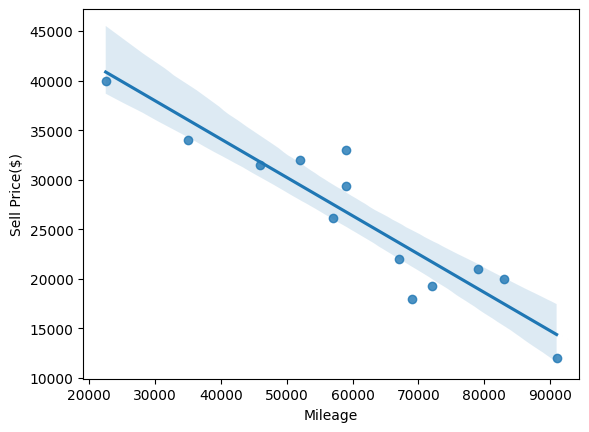

In [124]:
# check lr can be used on this data
import seaborn as sns
sns.regplot(data=df,x='Mileage',y='Sell Price($)')

<Axes: xlabel='Age(yrs)', ylabel='Sell Price($)'>

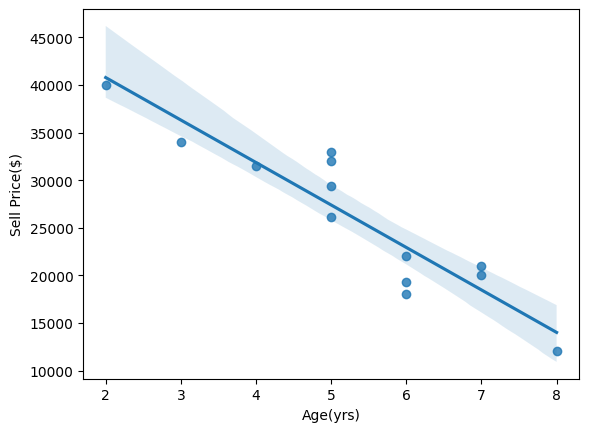

In [125]:
sns.regplot(data=df,x='Age(yrs)',y='Sell Price($)')

In [126]:
# above plots are showing linear relation
# to use one hot encoding, first we should use label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [127]:
# fit and transform the data frame using le on car model col
# see the new data frame where car model will be 1,0,2
# here, 1=BMW x5, 0 = Audi A5, 2= Mercedez Benz c Class
df['Car Model'] = le.fit_transform(df['Car Model'])
df['Car Model']

,Car Model
0,1
1,1
2,1
3,1
4,1
5,0
6,0
7,0
8,0
9,2


In [128]:
# take independent variable or features
x3= df[['Car Model', 'Mileage', 'Age(yrs)']]
x3

,Car Model,Mileage,Age(yrs)
0,1,69000,6
1,1,35000,3
2,1,57000,5
3,1,22500,2
4,1,46000,4
5,0,59000,5
6,0,52000,5
7,0,72000,6
8,0,91000,8
9,2,67000,6


In [129]:
# retrive target or dependent variable
y3= df['Sell Price($)']
y3

,Sell Price($)
0,18000
1,34000
2,26100
3,40000
4,31500
5,29400
6,32000
7,19300
8,12000
9,22000


In [130]:
# apply OneHotEncoding on car model


from sklearn.preprocessing import OneHotEncoder
ohe= OneHotEncoder(handle_unknown='ignore')
x1 = ohe.fit_transform(df[['Car Model']])
x1

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 13 stored elements and shape (13, 3)>

In [131]:
# x1 is sparse matrix, convert it into array and dataframe
x1=pd.DataFrame(x1.toarray())
x1

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,0.0,0.0,1.0


In [132]:
# to avoid dummy variable trape, drop 0th col


x1= x1.iloc[:,1:]
x1

,1,2
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,1.0


In [133]:
# add these x1 into col to x
x3=pd.concat([x3,x1],axis="columns")
x3

,Car Model,Mileage,Age(yrs),1,2
0,1,69000,6,1.0,0.0
1,1,35000,3,1.0,0.0
2,1,57000,5,1.0,0.0
3,1,22500,2,1.0,0.0
4,1,46000,4,1.0,0.0
5,0,59000,5,0.0,0.0
6,0,52000,5,0.0,0.0
7,0,72000,6,0.0,0.0
8,0,91000,8,0.0,0.0
9,2,67000,6,0.0,1.0


In [134]:
# remove car model as it is avilable in encoded form
x3.drop('Car Model',axis=1,inplace=True)
x3

,Mileage,Age(yrs),1,2
0,69000,6,1.0,0.0
1,35000,3,1.0,0.0
2,57000,5,1.0,0.0
3,22500,2,1.0,0.0
4,46000,4,1.0,0.0
5,59000,5,0.0,0.0
6,52000,5,0.0,0.0
7,72000,6,0.0,0.0
8,91000,8,0.0,0.0
9,67000,6,0.0,1.0


In [135]:
#here every column name must be string so next additional code is important

In [136]:
x3.columns = x3.columns.map(str)
x3

,Mileage,Age(yrs),1,2
0,69000,6,1.0,0.0
1,35000,3,1.0,0.0
2,57000,5,1.0,0.0
3,22500,2,1.0,0.0
4,46000,4,1.0,0.0
5,59000,5,0.0,0.0
6,52000,5,0.0,0.0
7,72000,6,0.0,0.0
8,91000,8,0.0,0.0
9,67000,6,0.0,1.0


In [137]:
# lr model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x3,y3) # train model

LinearRegression()

In [138]:
model.predict([[45000,4,0,1]])  # predict mercedez benz that is 4 year old with mileage 45000 kilometer

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [139]:
model.predict([[86000,7,1,0]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

In [140]:
# know the score of your model
model.score(x3,y3)

0.9417050937281083